In [1]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [2]:
base_path = '../../results_metrics_aggregated_bme/perturbagen_pred'

In [3]:
##########
#Mechanistic baselines 
##########
# Initialize an empty dictionary
performance = {}
selector = {'cancer_genes': 'Cancer genes',
            'cancer_targets': 'Cancer targets',
            'random': 'Random',
            'perturbed_genes': 'Perturbed genes'
            }
paths = glob(osp.join(base_path, 'baselines/v2/mechanistic/random/*/*_chemical*.csv'))

for path in paths:
    df = pd.read_csv(path)

    # Iterate over the rows of the DataFrame
    for _, row in df.iterrows():
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        if metric == 'ranking score - DCG':
            metric = 'nDCG'
        baseline = selector[path.split('/')[8]]

        cellline = row['Cellline']
        folds = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        if metric not in performance[cellline]:
            performance[cellline][metric] = {}
        if baseline not in performance[cellline][metric]:
            performance[cellline][metric][baseline] = []
        
        # Add the folds data to the dictionary
        performance[cellline][metric][baseline] = folds
    


In [4]:
performance['A549'].keys()

dict_keys(['percentage of samples with partially accurate predictions', 'rankings', 'nDCG', 'recall@1', 'recall@10', 'recall@100', 'recall@1000'])

In [5]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'v2/Biolord/chemical/random/biolord_chemical_within_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [6]:
performance['A549']['rankings'].keys()

dict_keys(['Cancer genes', 'Cancer targets', 'Random', 'Perturbed genes', 'Biolord'])

In [7]:
##########
#cellOT
##########

paths = glob(osp.join(base_path, 'v2/cellot/chemical/random/cellot_chemical_within_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [8]:
##########
#ChemCPA
##########

paths = glob(osp.join(base_path, 'v2/ChemCPA/random/chemcpa_chemical_within_*.csv'))

for path in paths:
    df = pd.read_csv(path)
    # Process the new DataFrame to update the dictionary
    method_name = 'ChemCPA'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['dcg']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [9]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'v2/PDGrapher/chemical/random/*_drugpred_within_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'

    # Populate the dictionary
    for index, row in df.iterrows():
        cell_line = row['Cellline']
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        if metric == 'ranking score - DCG':
            metric = 'nDCG'
        
        
        if cell_line not in performance:
            performance[cell_line] = {}
            
        if metric not in performance[cell_line]:
            performance[cell_line][metric] = {method_name: []}
        
        values = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        performance[cell_line][metric]['PDGrapher'] = values


In [10]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'v2/scGEN/chemical/random/scgen_chemical_within*.csv'))

for path in paths:
    df = pd.read_csv(path)
    
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'

    # Iterate over the rows of the new DataFrame
    for _, row in df.iterrows():
        cellline = row['cellline1']
        metric_data = {
            'recall@1': row['recall_at_1'],
            'recall@10': row['recall_at_10'],
            'recall@100': row['recall_at_100'],
            'recall@1000': row['recall_at_1000'],
            'percentage of samples with partially accurate predictions': row['perc_partially_accurate_predictions'],
            'rankings': row['rankings'],
            'nDCG': row['Ranking_DCG']
        }
        
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name].append(value)


In [11]:
performance['A549']['rankings'].keys()

dict_keys(['Cancer genes', 'Cancer targets', 'Random', 'Perturbed genes', 'Biolord', 'CellOT', 'ChemCPA', 'PDGrapher', 'scGen'])

In [12]:
# Delete 'HA1E' from the performance dictionary
if 'HA1E' in performance:
    del performance['HA1E']

In [13]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP'
}

## Panel proportion of partially accurate samples

/tmp/ipykernel_2805261/1959197095.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


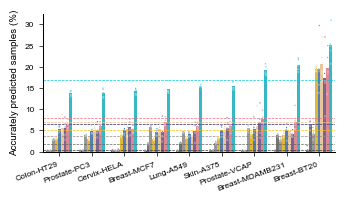

In [14]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ['/home/gonzag46/.fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42  # Output Type 42 (TrueType), editable in Illustrator

# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)



# Apply the mapping to replace cell lines with cancer types
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)

# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']


# Define a color palette that matches the existing figures
palette = {
    'Biolord': '#f3c283',
    'ChemCPA': '#2C70B9',
    'PDGrapher': '#04C4D9',
    'Cancer genes': '#636363',
    'Cancer targets': '#8C8C8C',
    'CellOT': '#6f4a8e',
    'Random': '#333333',
    'scGen': '#ED697D',
    'Perturbed genes': '#FFC000'
}

# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=1, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    # plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.legend([], [], frameon=False)
    plt.subplots_adjust(right=0.95, bottom = 0.25)
    plt.ylabel('Accurately predicted samples (%)')
    plt.xticks(rotation=20, ha="right")
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred.pdf'))
    plt.show()




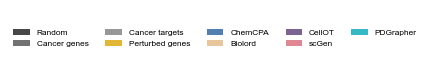

In [15]:
# Create a separate figure for the legend
with sns.plotting_context(plotting_context):
    fig_legend = plt.figure(figsize=(3.543, 0.73))  # Adjust size for the legend
    ax_legend = fig_legend.add_subplot(111)

    # Remove axis for the legend figure
    ax_legend.axis('off')

    # Create the legend using the handles and labels from the original plot
    legend = ax_legend.legend(bar_handles, bar_labels, loc='center', ncol=5, frameon=False, title=None)

    # Save the legend figure
    plt.savefig(osp.join(outdir, 'legend_only.pdf'), bbox_inches=None, pad_inches=0)

    # Show the legend-only figure
    plt.show()

In [16]:
df = df_mean
metric = 'percentage of samples with partially accurate predictions'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df = comparison_df.sort_values(by = 'Difference', ascending = False)




## Panel nDCG

/tmp/ipykernel_2805261/2885745679.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


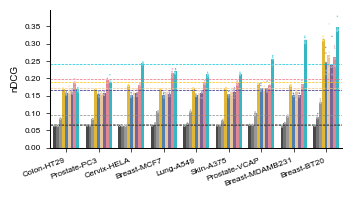

In [18]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract the data for 'rankings' into a DataFrame
metric = 'nDCG'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# Order cell lines based on values for PDGrapher
pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# Reorder the DataFrame based on ordered cell lines
df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)
# Apply the mapping to replace cell lines with cancer types
df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)

# Replace x-axis labels with cancer types
df['Cell Line'] = df['Cancer Type']
df_mean['Cell Line'] = df_mean['Cancer Type']


# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Create a bar plot for each method
    sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

    # Overlay individual data points
    sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=1, edgecolor="white", linewidth=0.2)





    # Add horizontal lines for the overall mean ranking for each method
    for method in method_order:
        overall_mean = df[df['Method'] == method][metric].mean()
        plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

    # Remove title
    plt.title('')
    plt.ylim

    # Remove X-axis label
    plt.xlabel('')
    sns.despine()

    # Adjust legend to only include the bars and place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    bar_handles = handles[:len(method_order)]
    bar_labels = labels[:len(method_order)]
    # plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.55, 1.20), loc='upper center', ncol=4, frameon=False, title=None)
    plt.legend([], [], frameon=False)
    plt.subplots_adjust(right=0.95, bottom = 0.25)
    plt.xticks(rotation=20, ha="right")
    plt.ylabel('nDCG')
    plt.savefig(osp.join(outdir, 'panel_ndcg.pdf'))
    plt.show()


In [19]:
performance['A375']['nDCG']['PDGrapher']

[0.2171871119307822,
 0.2136007010718661,
 0.2134398495617041,
 0.2119862330820305,
 0.2099141812636527]

In [20]:
df = df_mean
metric = 'nDCG'
# Step 1: Filter out the data for PDGrapher
pdgrapher_df = df[df['Method'] == 'PDGrapher']

# Step 2: Identify the second-best method for each cell line
second_best_df = df[df['Method'] != 'PDGrapher'].copy()

# Group by cell line and find the second best method (highest value)
second_best_df = second_best_df.sort_values(by=['Cell Line', metric], ascending=False)
second_best_df = second_best_df.groupby('Cell Line').first().reset_index()

# Step 3: Merge the two DataFrames to compare PDGrapher with the second-best method
comparison_df = pd.merge(pdgrapher_df, second_best_df, on='Cell Line', suffixes=('_PDGrapher', '_SecondBest'))

# Step 4: Calculate the absolute difference
comparison_df['Difference'] = comparison_df[metric + '_PDGrapher'] - comparison_df[metric + '_SecondBest']

# Display the result
comparison_df = comparison_df[['Cell Line', 'Method_SecondBest', metric + '_PDGrapher', metric + '_SecondBest', 'Difference']]
comparison_df.sort_values(by = 'Difference', ascending = False)


,Cell Line,Method_SecondBest,nDCG_PDGrapher,nDCG_SecondBest,Difference
6,Breast-MDAMB231,scGen,0.310692,0.184856,0.125836
8,Prostate-VCAP,Perturbed genes,0.256365,0.184942,0.071423
3,Cervix-HELA,scGen,0.243905,0.181950,0.061955
2,Breast-BT20,Perturbed genes,0.347504,0.313221,0.034283
0,Skin-A375,scGen,0.213226,0.185892,0.027333
1,Lung-A549,scGen,0.210914,0.188394,0.022520
5,Breast-MCF7,scGen,0.219861,0.216209,0.003652
7,Prostate-PC3,scGen,0.190161,0.195588,-0.005426
4,Colon-HT29,scGen,0.168395,0.186823,-0.018427


## Aggregated recall@k

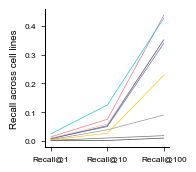

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the data
data = []

# Iterate over the performance dictionary to extract all recall metrics
for cellline, metrics in performance.items():
    for metric in ['recall@1', 'recall@10', 'recall@100']:
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, metric, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Metric', 'Method', 'Value'])

# Convert the 'Value' column to numeric to avoid any conversion issues
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate the mean for each method and metric across all cell lines
df_mean = df.groupby(['Metric', 'Method'])['Value'].mean().reset_index()



# Define the order of methods
method_order = ['Random', 'Cancer genes', 'Cancer targets', 'Perturbed genes', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']
df_mean['Metric'] = [e.capitalize() for e in df_mean['Metric']]
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))

    # Create a line plot for each method showing the mean across all cell lines
    sns.lineplot(data=df_mean, x='Metric', y='Value', hue='Method', palette=palette, hue_order=method_order, markers=True, dashes=False, alpha=0.9)

    # Remove X-axis label
    plt.xlabel('')

    sns.despine()

    # Adjust legend to place it at the top
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles =  handles[:len(method_order)]
    line_labels = labels[:len(method_order)]
    plt.legend([], [], frameon=False)
    # plt.subplots_adjust(top=0.9)
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.2)
    plt.ylabel('Recall across cell lines')
    plt.savefig(osp.join(outdir, 'aggregated_mean_recall_metrics.pdf'))
    plt.show()


In [23]:
# Step 1: Group by Cell Line, Metric, and Method, and compute the mean value for each combination
grouped = df.groupby(['Cell Line', 'Metric', 'Method'])['Value'].mean().reset_index()

# Step 2: Compute the differences for each combination of Cell Line and Metric
def compute_difference(group):
    # Sort by Value descending for the current Cell Line and Metric
    group = group.sort_values(by='Value', ascending=False).reset_index(drop=True)
    
    # Check if PDGrapher is in the current group
    if 'PDGrapher' not in group['Method'].values:
        return None  # Skip if PDGrapher is not present

    # Find PDGrapher's value
    pdgrapher_value = group[group['Method'] == 'PDGrapher']['Value'].values[0]
    
    # Determine best and second-best
    best_value = group.iloc[0]['Value']
    second_best_value = group.iloc[1]['Value'] if len(group) > 1 else None

    # Compute the difference with the appropriate value
    if group.iloc[0]['Method'] == 'PDGrapher':  # PDGrapher is the best
        return pdgrapher_value - second_best_value if second_best_value is not None else None
    else:  # PDGrapher is not the best
        return pdgrapher_value - best_value

# Step 3: Apply the function to compute differences for each combination of Cell Line and Metric
differences = grouped.groupby(['Cell Line', 'Metric']).apply(compute_difference).reset_index(name='Difference')

# Step 4: Compute the average difference per Cell Line
mean_per_cell_line = differences.groupby('Cell Line')['Difference'].mean().reset_index()

# Step 5: Print or use the result
mean_per_cell_line

,Cell Line,Difference
0,A375,0.028722
1,A549,0.008594
2,BT20,-0.071312
3,HELA,0.051277
4,HT29,-0.033906
5,MCF7,-0.024319
6,MDAMB231,0.116460
7,PC3,-0.027456
8,VCAP,0.087704


## Panel metric ranks

/tmp/ipykernel_2805261/2316880697.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)


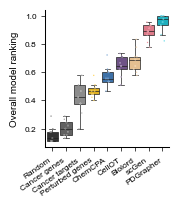

In [26]:
df = pd.read_csv(osp.join(base_path, 'v2/rank_table_chemical_within_v2.csv'))
df = df.groupby(['Methods', 'Cellline']).mean().reset_index()

# Rename the methods in the 'Methods' column
df['Methods'] = df['Methods'].replace({
    'BL Rand Cancer Genes': 'Cancer genes',
    'BL Rand Cancer Target': 'Cancer targets',
    'BL Rand Random': 'Random',
    'BL Rand Pert Genes': 'Perturbed genes',
    'chemCPA': 'ChemCPA',
    'PDgrapher': 'PDGrapher',
    'scGEN': 'scGen'
})

df['rank'] = df['rank']/len(df.Methods.unique())

import matplotlib.pyplot as plt
import seaborn as sns

# Order of methods
# method_order = ['Random', 'Cancer genes', 'Cancer targets', 'ChemCPA', 'CellOT', 'Biolord', 'scGen', 'PDGrapher']
# Calculate the mean rank for each method
mean_rank = df.groupby('Methods')['rank'].mean().reset_index()

# Sort the methods based on mean rank
method_order = mean_rank.sort_values('rank')['Methods'].tolist()
with sns.plotting_context(plotting_context):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(1.7715, 2.19))
    # Create the box plot with method order and custom palette
    sns.boxplot(x='Methods', y='rank', data=df, order=method_order, palette=palette, showfliers=False, linewidth=0.5)

    # Add individual data points with matching colors
    sns.stripplot(x='Methods', y='rank', data=df, hue='Methods', alpha=0.8, hue_order=method_order, palette=palette, edgecolor="white", linewidth=0.2, size=1, jitter=0.15)

    # Remove the legend for the stripplot
    plt.legend([], [], frameon=False)

    # Show the plot
    plt.title('')
    plt.ylabel('Overall model ranking')
    plt.xlabel('')
    plt.subplots_adjust(right=0.9, bottom = 0.25, left=0.2)
    plt.xticks(rotation=35, ha="right")
    sns.despine()
    # sns.set_context("notebook", font_scale=1.5)
    
    plt.savefig(osp.join(outdir, 'panel_all_metrics_ranking.pdf'))
    plt.show()



## Panels distance between predicted genes and GT genes in the PPI (PDGrapher vs random)

In [25]:

import torch
import networkx as nx
import pickle

outdir = 'distance_predicted_targets_and_gt'


all_lengths_ours_to_real = {}
all_lengths_random_to_real = {}
cell_line_path_dict = {}

for cell_line in ["A549", "A375", "BT20", "HELA", "HT29", "MCF7", "MDAMB231", "PC3", "VCAP"]:
    #Loads edge index 
    base_path = "../../data/processed/torch_data/chemical/real_lognorm"
    path_edge_index = osp.join(base_path, 'edge_index_{}.pt'.format(cell_line))
    edge_index = torch.load(path_edge_index)
    G = nx.Graph() 
    G.add_edges_from(tuple(zip(edge_index[0,:].tolist(), edge_index[1,:].tolist())))
    performance = pd.read_csv('../../results_metrics_aggregated_bme/perturbagen_pred/PDgrapher/within/chemical/val/{}_drugpred_within_best.csv'.format(cell_line))
    ngnn = performance[performance['Set'] == 'Test']['GNN'].iloc[0]
    model_path = glob('../../experiments_resubmission_bme/results/chemical/{}_corrected_pos_emb/n_gnn_{}*'.format(cell_line, ngnn))[0]
    random_path = '../../baselines/mechanistic/results/mechanistic/baseline_random_chemical/random/{}/random'.format(cell_line)
    our_predicted_interventions = pickle.load(open(osp.join(model_path, 'retrieved_interventions.pkl'), "rb"))
    our_real_interventions = pickle.load(open(osp.join(model_path, 'real_interventions.pkl'), "rb"))
    random_predicted_interventions = pickle.load(open(osp.join(random_path, 'retrieved_interventions.pkl'), "rb"))
    random_real_interventions = pickle.load(open(osp.join(random_path, 'real_interventions.pkl'), "rb"))
    for i in our_real_interventions.keys():
        assert len(our_predicted_interventions[i]) == len(our_real_interventions[i]), "predicted and real interventions should have the same length (our model)"
        assert len(random_predicted_interventions[i]) == len(random_real_interventions[i]), "predicted and real interventions should have the same length (random model)"
        assert len(random_predicted_interventions[i]) == len(our_predicted_interventions[i]), "our model and random model should have the same length"
    #Outpath
    outpath = osp.join(outdir, '/'.join(model_path.split('/')[-2:]))
    os.makedirs(outpath, exist_ok=True)
    cell_line_path_dict[cell_line] = outpath
    #Computes the distances if not pre-saved
    if not os.path.exists(osp.join(outpath, 'random_to_real.txt')):
        length = dict(nx.all_pairs_shortest_path_length(G))
        lengths_ours_to_real = []
        lengths_random_to_real = []
        for split_index in our_predicted_interventions.keys():
            pred_ours = our_predicted_interventions[split_index]
            pred_random = random_predicted_interventions[split_index]
            real = our_real_interventions[split_index]
            for i in range(len(pred_ours)):
                pred_ours_i = pred_ours[i]
                pred_random_i = pred_random[i]
                real_i = real[i]
                for j in range(len(real_i)):
                    for jj in range(len(real_i)):
                        lengths_ours_to_real.append(length[real_i[j]][pred_ours_i[jj]])
                        lengths_random_to_real.append(length[real_i[j]][pred_random_i[jj]])
        pd.DataFrame(lengths_random_to_real).to_csv(osp.join(outpath, 'random_to_real.txt'), index=False, header=None)
        pd.DataFrame(lengths_ours_to_real).to_csv(osp.join(outpath, 'ours_to_real.txt'), index=False, header=None)
    else:
        lengths_random_to_real = pd.read_csv(osp.join(outpath, 'random_to_real.txt'),header=None)[0].tolist()
        lengths_ours_to_real = pd.read_csv(osp.join(outpath, 'ours_to_real.txt'),  header=None)[0].tolist()
    all_lengths_ours_to_real[cell_line] = lengths_ours_to_real
    all_lengths_random_to_real[cell_line] = lengths_random_to_real



/home/gonzag46/scratch/conda/envs/pdgrapher/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


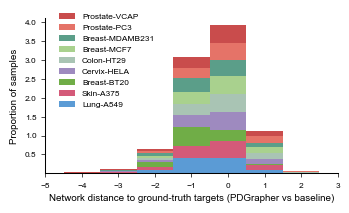

In [26]:
####Stacked histogram of the distances of PDGrapher - Random for all cell lines togheter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


cell_lines = list(all_lengths_ours_to_real.keys())

# Predefined colors for each cell line
cell_line_colors = {
    'A549': '#fdecef',    # Very light pink
    'A375': '#f8c2c9',    # Light pink
    'BT20': '#f399a3',    # Soft pink
    'HELA': '#ee6f7d',    # Medium light pink
    'HT29': '#ed697d',    # Medium pink
    'MCF7': '#d65866',    # Darker pink
    'MDAMB231': '#b34652',# Rich pink
    'PC3': '#8f343e',     # Deeper pink
    'VCAP': '#6b222a'     # Darkest pink
}

cell_line_colors = {
    'VCAP': '#C94C4C',   # Deep Red
    'PC3': '#E57368',  # Coral Red
    'HT29': '#A9C4B4',  # Mint Green
    'HELA': '#9E8ABF',  # Lavender Purple
    'MDAMB231': '#5B9E89',  # Teal
    'MCF7': '#A9D18E',  # Light Green
    'BT20': '#70AD47',  # Olive Green
    'A375': '#D45A79',  # Dusty Rose (replaces orange)
    'A549': '#5B9BD5',  # Medium Blue
    
}


# Set up the bins based on the possible range of differences
all_differences = []

for cell_line in cell_lines:
    lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
    lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
    # Compute the element-wise difference (random - ours)
    difference_lengths =  np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
    all_differences.extend(difference_lengths)

bins = np.arange(min(all_differences), max(all_differences) + 1) - 0.5

with sns.plotting_context(plotting_context):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(3.543, 2.19))

    # Plot stacked histogram
    bottoms = np.zeros(len(bins) - 1)

    for cell_line in cell_lines:
        lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
        lengths_random_to_real = all_lengths_random_to_real[cell_line]
        
        # Compute the element-wise difference (random - ours)
        difference_lengths = np.array(lengths_ours_to_real) - np.array(lengths_random_to_real)
        
        # Calculate the histogram counts
        counts, _ = np.histogram(difference_lengths, bins=bins)
        
        # Normalize to get proportions
        proportions = counts / np.sum(counts)
        
        # Plot the proportion-based histogram for this cell line
        ax.bar(bins[:-1] + 0.5, proportions, bottom=bottoms, width=1.0, color=cell_line_colors[cell_line], label=cell_line_to_cancer_type[cell_line])
        
        # Update the bottom position for the next stack
        bottoms += proportions

    # Adding labels and title
    ax.set_xlabel('Network distance to ground-truth targets (PDGrapher vs baseline)')
    ax.set_ylabel('Proportion of samples')
    ax.set_title('')
    ax.set_xlim(-5, 3)

    # Customize the legend
    # Get current handles and labels
    handles, labels = ax.get_legend_handles_labels()

    # Reverse the order of handles and labels
    handles = handles[::-1]
    labels = labels[::-1]

    # Add the legend back with reversed order
    ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.02, 1.08), frameon=False, title=None)
    # ax.legend(loc='upper right', bbox_to_anchor=(1.10, 1.17), frameon=False, title=None)
    sns.despine()
    plt.subplots_adjust(bottom=0.17, right=0.95)
    # ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # Add 2 minor ticks between major x ticks
    # ax.yaxis.set_minor_locator(AutoMinorLocator(4))  # Add 2 minor ticks between major y ticks
    # ax.tick_params(axis='both', which='minor', length=4, color='gray')  # Style the minor ticks
    
    plt.savefig(osp.join(outdir, 'stacked_histogram_proportion_difference_random_pdgrapher.pdf'), transparent=True)
    plt.show()


In [27]:

# #Put all data together
# lengths_ours_to_real = np.concatenate([all_lengths_ours_to_real[e] for e in all_lengths_ours_to_real]).tolist()
# lengths_random_to_real = np.concatenate([all_lengths_random_to_real[e] for e in all_lengths_random_to_real]).tolist()
# data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
# data.columns = ['distance', 'Model']

# colors = ['#04C4D9', '#333333']

# with sns.plotting_context(plotting_context_small):
#     sns.set_palette(sns.color_palette(colors))

#     weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
#     weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
#     weights = np.concatenate([weights_ours, weights_random])
#     data['weights'] = weights
#     ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

#     ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
#     sns.move_legend(
#                         ax, "lower left",
#                         bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
#                     )
#     plt.subplots_adjust(top=0.9, right=0.92, left=0.2)
#     plt.savefig(osp.join(outpath, '../../panel_distribution_network_distance_model_vs_random_alltogether.pdf'.format(cell_line)), transparent=True)
#     plt.close()

In [28]:

# #Individual plots

# for cell_line in all_lengths_ours_to_real.keys():
#     lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
#     lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
#     data = pd.DataFrame([lengths_ours_to_real + lengths_random_to_real, ['PDGrapher' for i in range(len(lengths_ours_to_real))] + ['Random' for i in range(len(lengths_random_to_real))]]).transpose()
#     data.columns = ['distance', 'Model']

#     colors = ['#04C4D9', '#333333']

#     with sns.plotting_context(plotting_context_small):
#         sns.set_palette(sns.color_palette(colors))

#         weights_ours = np.ones_like(lengths_ours_to_real) / len(lengths_ours_to_real)
#         weights_random = np.ones_like(lengths_random_to_real) / len(lengths_random_to_real)
#         weights = np.concatenate([weights_ours, weights_random])
#         data['weights'] = weights
#         ax = sns.displot(data, x="distance", hue='Model', multiple='dodge', discrete=True, alpha = 0.8, weights='weights', height=1.7, aspect=0.7)

#         ax.set(xlabel='Shortest-path length', ylabel='Proportion of samples')
#         sns.move_legend(
#                             ax, "lower left",
#                             bbox_to_anchor=(.58, 0.7), ncol=1, title=None, frameon=False,
#                         )
#         plt.subplots_adjust(top=0.9, right=0.92, left=0.2)
#         plt.savefig(osp.join(cell_line_path_dict[cell_line], 'panel_distribution_network_distance_model_vs_random_{}.pdf'.format(cell_line)), transparent=True)
#         plt.close()
            

In [29]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you have the data in dictionaries `all_lengths_ours_to_real` and `all_lengths_random_to_real`
# cell_lines = list(all_lengths_ours_to_real.keys())

# # Predefined colors for each cell line
# cell_line_colors = {
#     'A549': '#1f77b4',    # Blue
#     'A375': '#ff7f0e',    # Orange
#     'BT20': '#2ca02c',    # Green
#     'HELA': '#d62728',    # Red
#     'HT29': '#9467bd',    # Purple
#     'MCF7': '#8c564b',    # Brown
#     'MDAMB231': '#e377c2',# Pink
#     'PC3': '#7f7f7f',     # Gray
#     'VCAP': '#bcbd22'     # Olive
# }

# # Set up the plot
# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot the difference proportions for each cell line
# for cell_line in cell_lines:
#     lengths_ours_to_real = all_lengths_ours_to_real[cell_line]
#     lengths_random_to_real = all_lengths_random_to_real[cell_line]
    
#     # Compute the element-wise difference (ours - random)
#     difference_lengths = np.array(lengths_random_to_real) - np.array(lengths_ours_to_real) 
    
#     # Calculate unique values from the difference
#     unique_values = np.unique(difference_lengths)
    
#     # Count occurrences of each unique value
#     difference_counts = np.array([np.sum(difference_lengths == value) for value in unique_values])
    
#     # Calculate proportions from the counts
#     difference_proportions = difference_counts / np.sum(difference_counts) if np.sum(difference_counts) > 0 else np.zeros_like(difference_counts)
    
#     # Plot the proportions based on the difference
#     ax.plot(unique_values, difference_proportions, marker='o', linestyle='-', color=cell_line_colors[cell_line], label=f'{cell_line}')

# # Customize the legend
# ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# # Adding labels and title
# ax.set_xlabel('Difference in Shortest-path length (PDGrapher - Random)')
# ax.set_ylabel('Proportion of Samples')
# ax.set_title('Proportions from Differences Between PDGrapher and Random Methods Across Cell Lines')

# # Add a horizontal line at y=0 for reference
# ax.axhline(0, color='black', linewidth=0.5, linestyle='--')

# plt.savefig('proportion_difference_lengths_pdgrapher_random.pdf', transparent=True)
# plt.show()


In [30]:
counts

array([     0,      3,     62,   1047,   3196,  13934,  71142, 107147,
        34061,   2360,     60])